In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm  #Machine learning Model
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
## Data Import
df=pd.read_excel("Xiomi Website Data.xlsx")

In [3]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 7 columns):
Customer              43200 non-null int64
Day                   43200 non-null object
Browser               43200 non-null object
No. of Clicks         43200 non-null int64
Pages Viewed          43200 non-null int64
Time (min)            43200 non-null float64
Amount Spent (Rs.)    43200 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

Customer              0
Day                   0
Browser               0
No. of Clicks         0
Pages Viewed          0
Time (min)            0
Amount Spent (Rs.)    0
dtype: int64

In [6]:
## information of the continuous data
df.describe()

,Customer,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,21600.500000,23.740000,4.820000,12.810000,6812.820000
std,12470.910151,8.267647,2.016853,6.002444,3201.905731
min,1.000000,8.000000,2.000000,4.300000,1784.000000
25%,10800.750000,18.000000,3.000000,8.500000,4473.000000
50%,21600.500000,22.500000,4.500000,11.400000,6215.000000
75%,32400.250000,29.000000,6.000000,15.100000,8412.000000
max,43200.000000,46.000000,10.000000,32.900000,15851.000000


In [7]:
## information of the categorical data
df.describe(include=['object'])  

,Day,Browser
count,43200,43200
unique,7,3
top,Friday,Chrome
freq,9504,23328


In [8]:
x= df.Day
x1= np.arange(len(df.Day))
x1

array([    0,     1,     2, ..., 43197, 43198, 43199])

In [9]:
df.columns

Index(['Customer', 'Day', 'Browser', 'No. of Clicks', 'Pages Viewed',
       'Time (min)', 'Amount Spent (Rs.)'],
      dtype='object')

In [10]:
## Rename the variables name
df.columns= [col.replace(' ', '_').lower()for col in df.columns]
df.columns
df= df.rename({'amount_spent_(rs.)':'amount'}, axis=True)
df.columns
df= df.rename({'no._of_clicks':'clicks'}, axis=True)
df.columns

Index(['customer', 'day', 'browser', 'clicks', 'pages_viewed', 'time_(min)',
       'amount'],
      dtype='object')

# Visualization

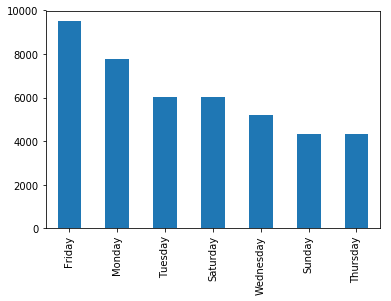

In [11]:
df['day'].value_counts().plot('bar')

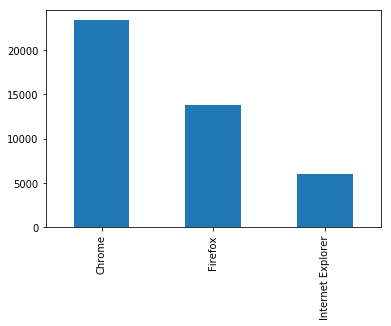

In [12]:
df['browser'].value_counts().plot('bar')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


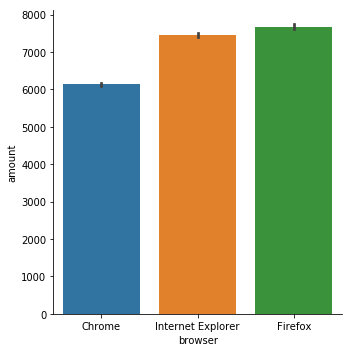

In [13]:
sns.factorplot(data=df,x='browser', y='amount',kind='bar')

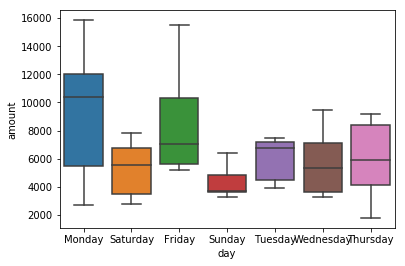

In [14]:
sns.boxplot(x='day', y='amount', data=df)

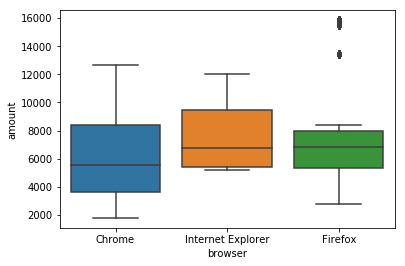

In [15]:
sns.boxplot(x='browser', y='amount', data=df)

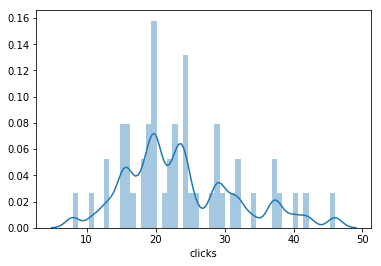

In [16]:
sns.distplot(df['clicks'])

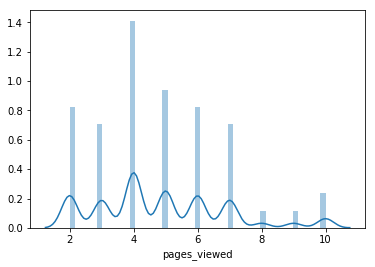

In [17]:
sns.distplot(df['pages_viewed'])

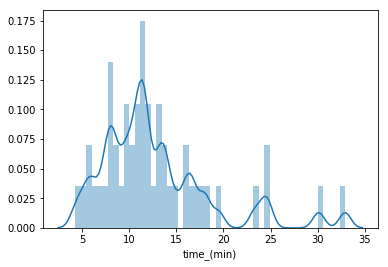

In [18]:
sns.distplot(df['time_(min)'])

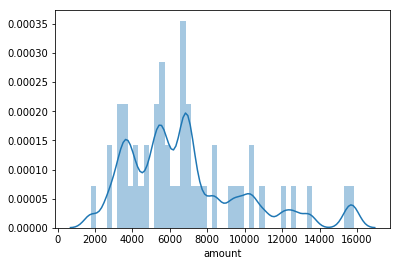

In [19]:
sns.distplot(df['amount'])

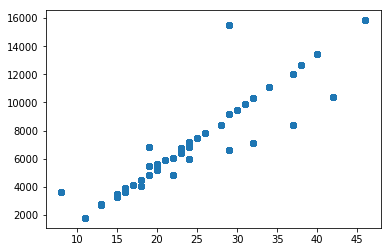

In [20]:
plt.scatter(df['clicks'], df['amount'])

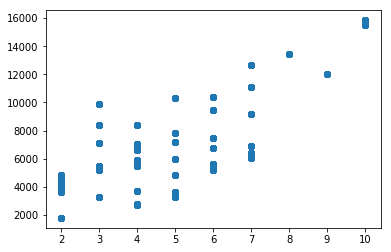

In [21]:
plt.scatter(df['pages_viewed'], df['amount'])

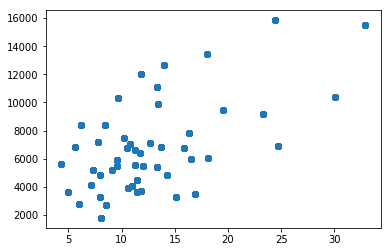

In [22]:
plt.scatter(df['time_(min)'], df['amount'])

# Correlation

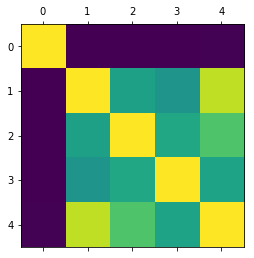

,customer,clicks,pages_viewed,time_(min),amount
customer,1.000000,0.002474,0.000821,-0.001407,0.002682
clicks,0.002474,1.000000,0.566934,0.516365,0.903248
pages_viewed,0.000821,0.566934,1.000000,0.595568,0.723667
time_(min),-0.001407,0.516365,0.595568,1.000000,0.580048
amount,0.002682,0.903248,0.723667,0.580048,1.000000


In [23]:
plt.matshow(df.corr())
plt.show()
df.corr()

In [24]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,customer,clicks,pages_viewed,time_(min),amount
customer,1,0.00247433,0.000820603,-0.00140723,0.0026815
clicks,0.00247433,1,0.566934,0.516365,0.903248
pages_viewed,0.000820603,0.566934,1,0.595568,0.723667
time_(min),-0.00140723,0.516365,0.595568,1,0.580048
amount,0.0026815,0.903248,0.723667,0.580048,1


In [56]:
X= df[['clicks']]
y= df[['amount']]

# Linear Regression

In [27]:
# Using Statmodel 
model= sm.ols(formula= 'y ~ X', data=df) 
fitted= model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                 1.914e+05
Date:                Thu, 03 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:51:39   Log-Likelihood:            -3.7344e+05
No. Observations:               43200   AIC:                         7.469e+05
Df Residuals:                   43198   BIC:                         7.469e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1491.6972     20.101    -74.211      0.000   -1531.095   -1452.300
X            349.8112      0.800    437.483      0.000     348.244     351.378
==============================================================================
Omnibus:                    21072.023   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           247889.095
Skew:                           2.060   Prob(JB):                         0.00
Kurtosis:                      13.988   Cond. No.                         76.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# Using SKlearn
model1 = LinearRegression()
model1.fit(X,y)
y_pred = model1.predict(X)

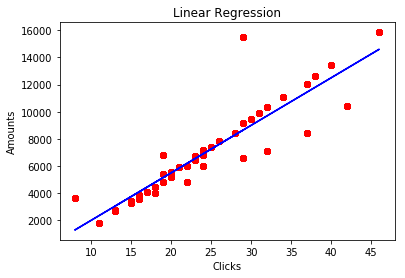

In [59]:
plt.scatter(X , y, color= 'red')
plt.plot(X, model1.predict(X), color= 'blue')
plt.title('Linear Regression')
plt.xlabel('Clicks')
plt.ylabel('Amounts')
plt.show()

In [64]:
## Root mean square error
rmse = sqrt(mean_squared_error(y, y_pred))
print(rmse)

1373.9819178008286
